## EDA 

In [ ]:
#system settings
import sys
sys.path.append("..") # Append source directory to our Python path

#basics
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#misc
# from preprocessing import *
from utils import *

#feature engineering 
from feature_adder import *

#settings
color = sns.color_palette()

In [ ]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [ ]:

print ('The size of the train set is {} and the size of the test set is {}'.format(train.shape, test.shape))

In [ ]:
x=train.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
#count number of clean entries
train['clean'].sum()
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total tags =",x.sum())

In [ ]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

In [ ]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
temp_df=train.iloc[:,2:-1]
corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

### High correllation between: 
- Obsence and toxic
- Obsence and insult
- Toxic and insult

        

## Count of the different combinations

In [44]:
columns = TAGS
counts_of_vector = train.groupby(['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])['toxic'].value_counts()
counts_of_vector.to_dict()
counts_of_vector

### Correlation matrix with the new features

In [45]:
df = FeatureAdded(upper_case=True, word_count=True, unique_words_count=True,
                      letter_count=True, punctuation_count=True, little_case=True,
                      stopwords=True, question_or_exclamation=True)
df_train, df_test = df.add_features(train, test)


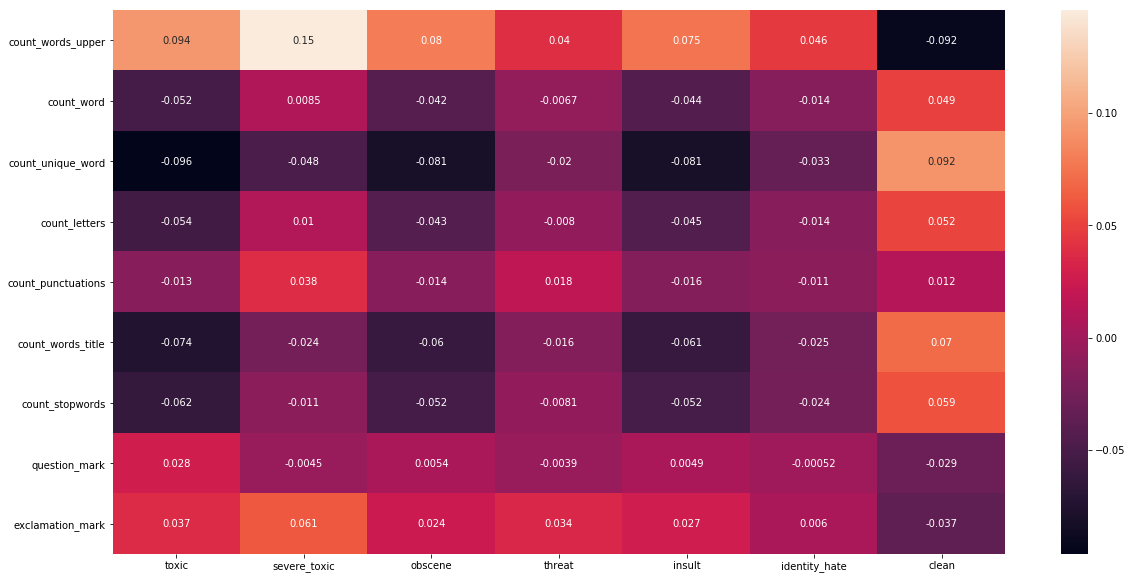

In [46]:
x_variables= TAGS + ['clean']
y_variables= ['count_words_upper', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_title', 'count_stopwords', 'question_mark',
       'exclamation_mark']
corr = df_train.corr()
corr = corr.loc[y_variables, x_variables]
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            xticklabels=x_variables,
            yticklabels=y_variables, 
            annot=True
           )
plt.show()